<a href="https://colab.research.google.com/github/plaban1981/Deep-Learning-KERAS/blob/master/Keras_deep_learning_Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST DATA Classification - ANN using Keras

https://github.com/PacktPublishing/Keras-Deep-Learning-Cookbook/blob/master/Chapter02/functional_apis_with_mnist.py

In [0]:
from keras.datasets import mnist


(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " +  str(y_test.shape))

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


# Keras Functional API

In [0]:
import keras
from keras.utils import plot_model
from keras.models import Model,Sequential
from keras.layers import Input,Dense,Reshape,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras import optimizers

# Hyperparmeters

In [0]:
num_classes = 10
batch_size = 32
epochs = 10
batch_size = 128
num_classes = 10 # since it contains digits 0 to 9
epochs = 12

In [0]:
cols =  ['Number of times pregnant',
'Plasma glucose concentration', 
'Diastolic blood pressure',
'Triceps skin fold thickness',
'2-Hour serum insulin',
'Body mass index',
'Diabetes pedigree function',
'Age',
'Class variable (0 or 1)']

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [0]:

dataset = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", delimiter=",",names=cols,header=None)

In [9]:
dataset.isnull().sum()[dataset.isnull().sum() > 0]

Series([], dtype: int64)

In [10]:
dataset.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
X = dataset.drop('Class variable (0 or 1)',axis=1)
Y = dataset['Class variable (0 or 1)']

In [0]:
import numpy as np

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=1)

# Build Model

In [0]:
model = Sequential()

In [0]:
model.add(Dense(128,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# Compile model

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 1032      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 2,193
Trainable params: 2,193
Non-trainable params: 0
_________________________________________________________________


# Class label visualization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


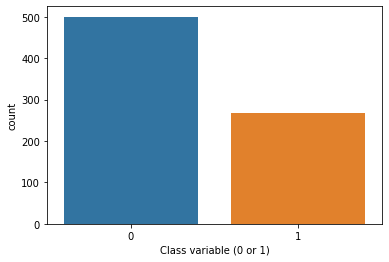

In [24]:
import seaborn as sns
sns.countplot(x='Class variable (0 or 1)',data=dataset)

# Fit the model

In [25]:
history = model.fit(X_train,y_train,epochs=150,validation_data=(X_test,y_test),verbose=2,shuffle=True)

Train on 614 samples, validate on 154 samples
Epoch 1/150
 - 0s - loss: 2.4700 - accuracy: 0.4300 - val_loss: 0.8699 - val_accuracy: 0.4740
Epoch 2/150
 - 0s - loss: 0.7332 - accuracy: 0.6466 - val_loss: 0.7506 - val_accuracy: 0.5779
Epoch 3/150
 - 0s - loss: 0.6932 - accuracy: 0.6433 - val_loss: 0.7577 - val_accuracy: 0.6299
Epoch 4/150
 - 0s - loss: 0.6852 - accuracy: 0.6515 - val_loss: 0.7626 - val_accuracy: 0.6299
Epoch 5/150
 - 0s - loss: 0.6814 - accuracy: 0.6531 - val_loss: 0.7715 - val_accuracy: 0.6429
Epoch 6/150
 - 0s - loss: 0.6799 - accuracy: 0.6531 - val_loss: 0.7683 - val_accuracy: 0.6429
Epoch 7/150
 - 0s - loss: 0.6778 - accuracy: 0.6547 - val_loss: 0.7823 - val_accuracy: 0.6494
Epoch 8/150
 - 0s - loss: 0.6726 - accuracy: 0.6580 - val_loss: 0.7783 - val_accuracy: 0.6429
Epoch 9/150
 - 0s - loss: 0.6753 - accuracy: 0.6564 - val_loss: 0.7613 - val_accuracy: 0.6429
Epoch 10/150
 - 0s - loss: 0.6738 - accuracy: 0.6531 - val_loss: 0.7574 - val_accuracy: 0.6429
Epoch 11/150


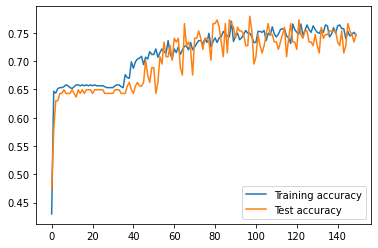

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Test accuracy')
plt.legend()
plt.show()

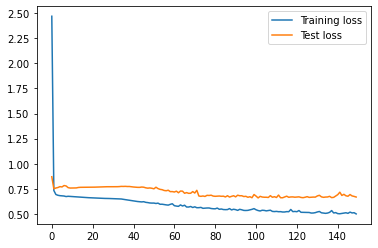

In [30]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Test loss')
plt.legend()
plt.show()

# Evaluate Model

In [31]:
scores = model.evaluate(X_test,y_test)

154/154 [==============================] - 0s 57us/step


In [32]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 74.68%
